In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_clean.csv")

In [3]:
# data cleaning and indexing 
df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT               N   
2003-01-01          OBTAIN CONTROLLED SUB BY FRAUD               N   
2003-01-01                          IDENTITY THEFT               N   
2003-01-01          INDECENCY WITH A CHILD/CONTACT               Y   
2003-01-01                          IDENTITY THEFT               N   

                       report_date_time     location_type  \
occurred_date_time                                          
2003-01-01          2009-07-22 11:09:00  RESIDENCE / HOME   
2003-01-01          2003-11-14 09:30:00               NaN   
2003-01-01          2011-02-08 15:14:00  RESIDENCE / HOME   
2003-01-01          2017-10-02 21:14:00  RESIDENCE / HOME   
2003-01-01          2013-03-11 17:28:00  RESIDENCE / HOME   

                                             address  zip_code  \
occurred_date_time                                               
2003-01-01                      1941 GASTON PLACE DR   78723.0   
2003-01-01                   6818 AUSTIN CENTER BLVD   78731.0   
2003-01-01                              8220 W SH 71   78735.0   
2003-01-01          1200 BLOCK AUSTIN HIGHLANDS BLVD   78745.0   
2003-01-01                       7001 S CONGRESS AVE   78745.0   

                    council_district apd_sector apd_district clearance_status  \
occurred_date_time                                                              
2003-01-01                       1.0         ID            4                N   
2003-01-01                      10.0         BA            8                N   
2003-01-01                       8.0         DA            6                N   
2003-01-01                       2.0         FR            4                N   
2003-01-01                       2.0         FR            3                N   

                         clearance_date   latitude  longitude  year  month  \
occurred_date_time                                                           
2003-01-01          2009-07-28 00:00:00  30.312126 -97.688964  2003      1   
2003-01-01          2003-12-01 00:00:00  30.350588 -97.751779  2003      1   
2003-01-01          2011-05-23 00:00:00  30.246747 -97.887325  2003      1   
2003-01-01          2018-08-02 00:00:00        NaN        NaN  2003      1   
2003-01-01          2013-03-12 00:00:00  30.188878 -97.780075  2003      1   

                    week  day  hour  
occurred_date_time                   
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0

highest_offense_description family_violence  \
occurred_date_time                                                   
2020-12-12 18:04:00                          THEFT               N   
2020-12-12 18:44:00  DISRUPTING MEETING/PROCESSION               N   
2020-12-12 18:45:00              THEFT FROM PERSON               N   
2020-12-12 19:48:00            THEFT FROM BUILDING               N   
2020-12-12 21:59:00             NUISANCE ABATEMENT               N   

                        report_date_time                 location_type  \
occurred_date_time                                                       
2020-12-12 18:04:00  2020-12-12 18:04:00               OTHER / UNKNOWN   
2020-12-12 18:44:00  2020-12-12 18:44:00  STREETS / HWY / ROAD / ALLEY   
2020-12-12 18:45:00  2020-12-12 20:56:00   DEPARTMENT / DISCOUNT STORE   
2020-12-12 19:48:00  2020-12-12 19:48:00              RESIDENCE / HOME   
2020-12-12 21:59:00  2020-12-12 21:59:00              BAR / NIGHT CLUB   

                                       address  zip_code  council_district  \
occurred_date_time                                                           
2020-12-12 18:04:00             6800 BURNET RD   78757.0               7.0   
2020-12-12 18:44:00  1600 S PLEASANT VALLEY RD   78741.0               3.0   
2020-12-12 18:45:00       5445 N IH 35 SVRD NB   78723.0               4.0   
2020-12-12 19:48:00         13201 LEGENDARY DR   78727.0               6.0   
2020-12-12 21:59:00             607 TRINITY ST   78701.0               9.0   

                    apd_sector apd_district clearance_status clearance_date  \
occurred_date_time                                                            
2020-12-12 18:04:00         BA            6              NaN            NaN   
2020-12-12 18:44:00         HE            2              NaN            NaN   
2020-12-12 18:45:00         ID            5              NaN            NaN   
2020-12-12 19:48:00         AD            3              NaN            NaN   
2020-12-12 21:59:00         GE            2              NaN            NaN   

                      latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                       
2020-12-12 18:04:00  30.344223 -97.738650  2020     12    50   12    18  
2020-12-12 18:44:00  30.238012 -97.720613  2020     12    50   12    18  
2020-12-12 18:45:00  30.314695 -97.707461  2020     12    50   12    18  
2020-12-12 19:48:00  30.436800 -97.730387  2020     12    50   12    19  
2020-12-12 21:59:00  30.267623 -97.738899  2020     12    50   12    21

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)

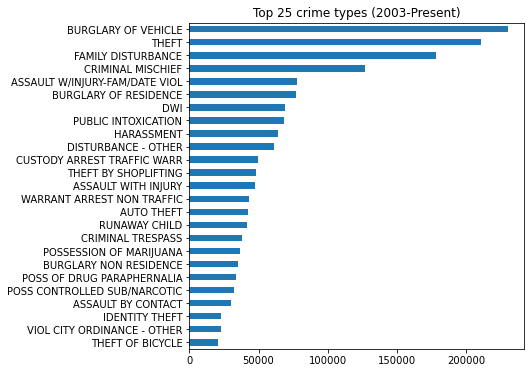

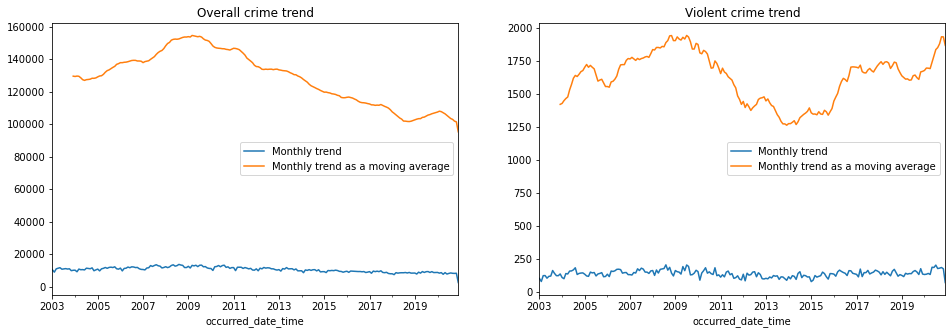

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(16, 5))
df.resample("M").size().plot(ax=axs[0])
df.resample("M").size().rolling(12).sum().plot(title="Overall crime trend", ax=axs[0])
axs[0].legend(["Monthly trend", "Monthly trend as a moving average"])
df_viol.resample("M").size().plot(ax=axs[1])
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend", ax=axs[1]
)
axs[1].legend(["Monthly trend", "Monthly trend as a moving average"])
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


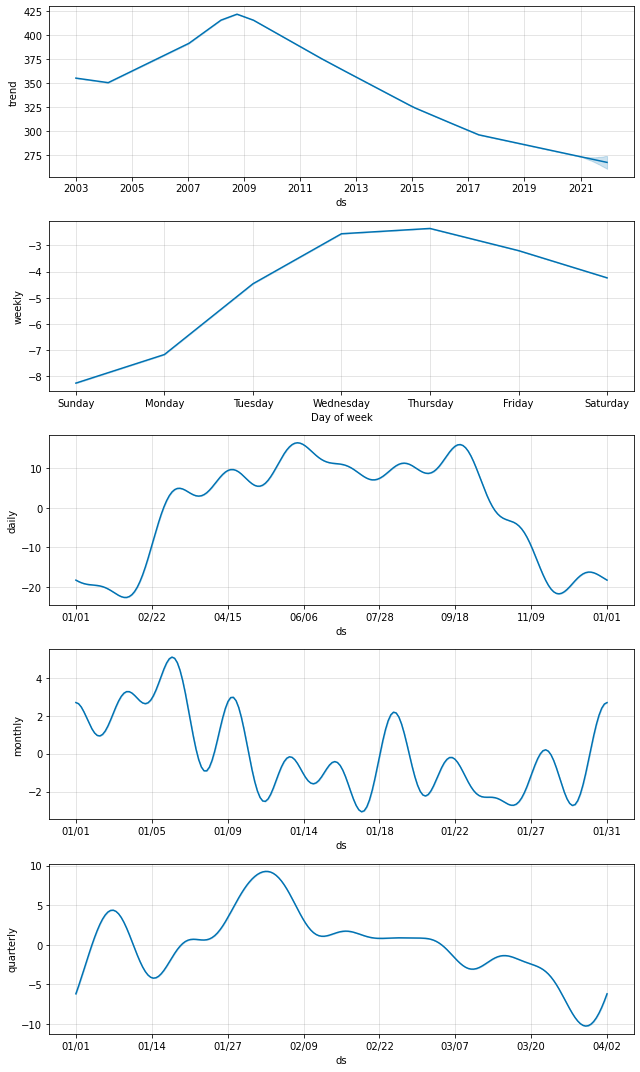

In [6]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


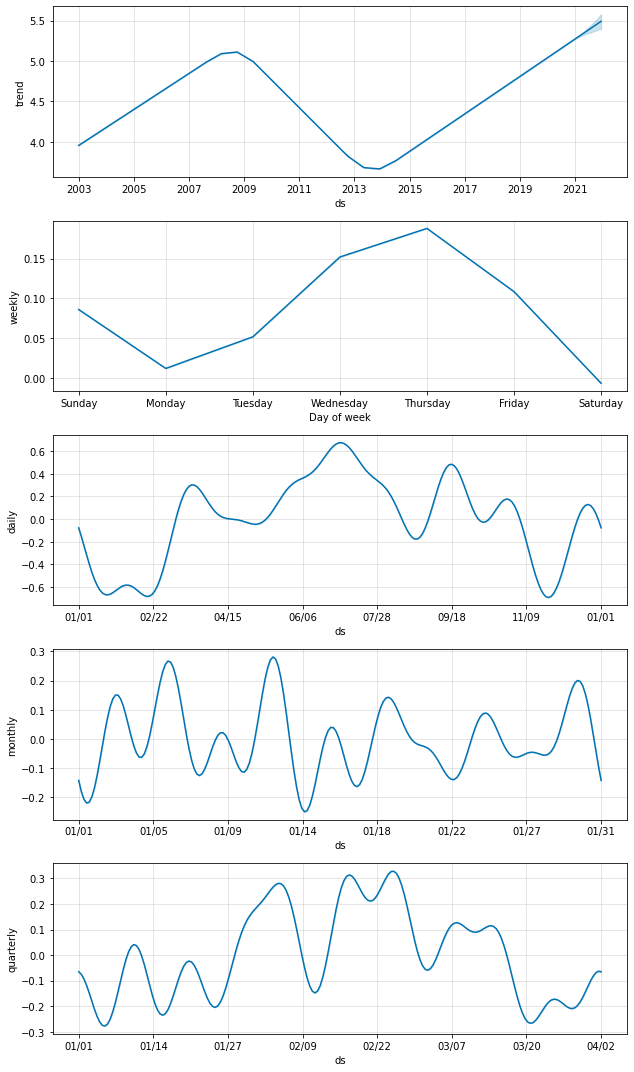

In [7]:
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1